## Preprocessing

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [115]:
def outliers(x):
  quartiles = np.quantile(x,[.25,.75])
  iqr = quartiles[1]-quartiles[0]
  lower_bound = quartiles[0]-(1.5*iqr)
  upper_bound = quartiles[1]+(1.5*iqr)

  potential_outliers = [outlier for outlier in x if outlier < lower_bound or outlier > upper_bound]
  return(potential_outliers)

In [144]:
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [145]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [146]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

For columns that have more than 10 unique values, determine the number of data points to use, and group the others in an "other" category.

In [31]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [183]:
outliers(application_df["APPLICATION_TYPE"].value_counts())

[27037]

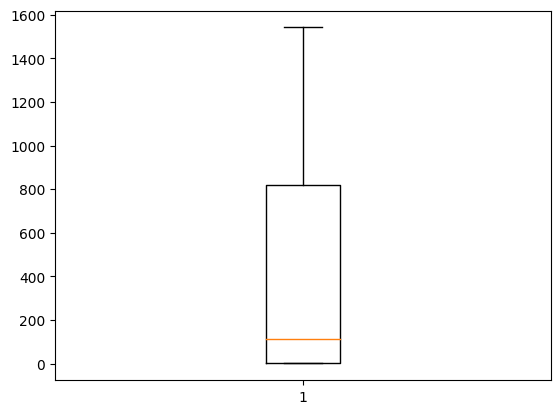

In [184]:
plt.boxplot(application_df["APPLICATION_TYPE"].value_counts().values[1:])
plt.show()

In [203]:
application_df["APPLICATION_TYPE"].value_counts().index

Index(['T3', 'T4', 'T6', 'T5', 'T19', 'T8', 'T7', 'T10', 'T9', 'T13', 'T12',
       'T2', 'T25', 'T14', 'T29', 'T15', 'T17'],
      dtype='object')

In [204]:
application_types_to_replace = application_df["APPLICATION_TYPE"].value_counts().index[0]
application_types_to_replace

'T3'

In [214]:
binnedTest1 = application_df.copy()

In [215]:
binnedTest1['APPLICATION_TYPE'] = binnedTest1['APPLICATION_TYPE'].replace("T3", "Other")

In [216]:
binnedTest1

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,Other,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,Other,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,Other,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [201]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Replace in dataframe'
"""if outliers more than one"""
"""for app in application_types_to_replace:
    binnedTest1['APPLICATION_TYPE'] = binnedTest1['APPLICATION_TYPE'].replace(app,"Other")

binnedTest1['APPLICATION_TYPE'].value_counts()"""

T
3


In [35]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [219]:
application_df["CLASSIFICATION"].value_counts().values

array([17326,  6074,  4837,  1918,  1883,   777,   287,   194,   116,
         114,   104,    95,    75,    58,    50,    36,    34,    32,
          32,    30,    20,    18,    16,    15,    15,    14,    11,
          10,    10,     9,     9,     7,     6,     6,     6,     5,
           5,     3,     3,     3,     2,     2,     2,     2,     2,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1])

In [220]:
outliers(application_df["CLASSIFICATION"].value_counts().values[1:11])

[6074, 4837]

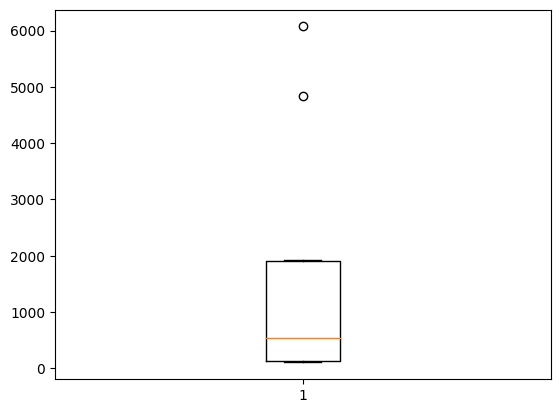

In [129]:
plt.boxplot(application_df["CLASSIFICATION"].value_counts().values[1:11])
plt.show()

In [221]:
classifications_to_replace = application_df["CLASSIFICATION"].value_counts().index[:3]
classifications_to_replace

Index(['C1000', 'C2000', 'C1200'], dtype='object')

In [222]:
binnedTest = binnedTest1.copy()

In [223]:
# Replace in dataframe
for cls in classifications_to_replace:
    binnedTest['CLASSIFICATION'] = binnedTest['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
binnedTest['CLASSIFICATION'].value_counts()

Other    28237
C3000     1918
C2100     1883
C7000      777
C1700      287
         ...  
C4120        1
C2561        1
C1245        1
C8210        1
C2150        1
Name: CLASSIFICATION, Length: 69, dtype: int64

In [224]:
binnedTest

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,Other,ProductDev,Association,1,0,N,5000,1
1,Other,Independent,Other,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,Other,CompanySponsored,Other,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,Independent,Other,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,Other,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,Other,CompanySponsored,Other,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [225]:
completeData = pd.get_dummies(binnedTest)
completeData

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
# Split the preprocessed data into a training and testing dataset

In [226]:
target = completeData["IS_SUCCESSFUL"]
features = completeData.drop(["IS_SUCCESSFUL"], axis=1)
features.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [227]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [228]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [229]:
X_train_scaled.shape

(25724, 114)

## Compile, Train, Evaluate, and Optimize the Model

In [272]:
nn = tf.keras.models.Sequential()

In [273]:
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 8)                 920       
                                                                 
 dense_56 (Dense)            (None, 5)                 45        
                                                                 
 dense_57 (Dense)            (None, 1)                 6         
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [248]:
"""hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 20

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()"""

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 50)                5750      
                                                                 
 dense_43 (Dense)            (None, 20)                1020      
                                                                 
 dense_44 (Dense)            (None, 1)                 21        
                                                                 
Total params: 6,791
Trainable params: 6,791
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 10

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()"""

In [254]:
"""hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 10

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 80)                9200      
                                                                 
 dense_46 (Dense)            (None, 40)                3240      
                                                                 
 dense_47 (Dense)            (None, 10)                410       
                                                                 
 dense_48 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,861
Trainable params: 12,861
Non-trainable params: 0
_________________________________________________________________


In [261]:
"""hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()"""

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 80)                9200      
                                                                 
 dense_50 (Dense)            (None, 40)                3240      
                                                                 
 dense_51 (Dense)            (None, 1)                 41        
                                                                 
Total params: 12,481
Trainable params: 12,481
Non-trainable params: 0
_________________________________________________________________


In [267]:
"""hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()"""

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 80)                9200      
                                                                 
 dense_53 (Dense)            (None, 30)                2430      
                                                                 
 dense_54 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11,661
Trainable params: 11,661
Non-trainable params: 0
_________________________________________________________________


In [275]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [276]:
# Train the model
modelFit = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6356 - accuracy: 0.6711
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5765 - accuracy: 0.7214
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5652 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5584 - accuracy: 0.7303
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5569 - accuracy: 0.7294
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7304
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7301
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5539 - accuracy: 0.7302
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5533 - accura

Use any or all of the following methods to optimize your model:

- Adjust the input data to ensure that no variables or outliers are causing confusion in the model, such as:
  - Dropping more or fewer columns.
  - Creating more bins for rare occurrences in columns.
  - Increasing or decreasing the number of values for each bin.
- Add more neurons to a hidden layer.
- Add more hidden layers.
- Use different activation functions for the hidden layers.
- Add or reduce the number of epochs to the training regimen.

In [277]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5600 - accuracy: 0.7305 - 450ms/epoch - 2ms/step
Loss: 0.5599817633628845, Accuracy: 0.7304956316947937


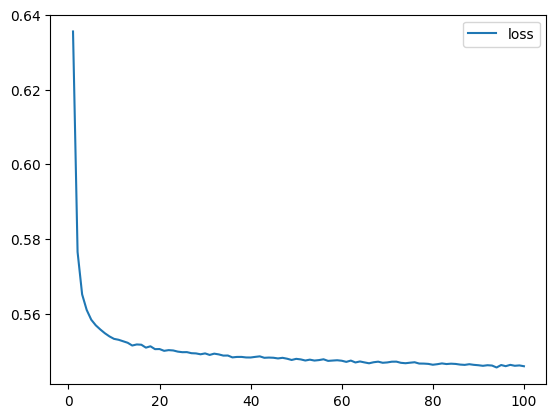

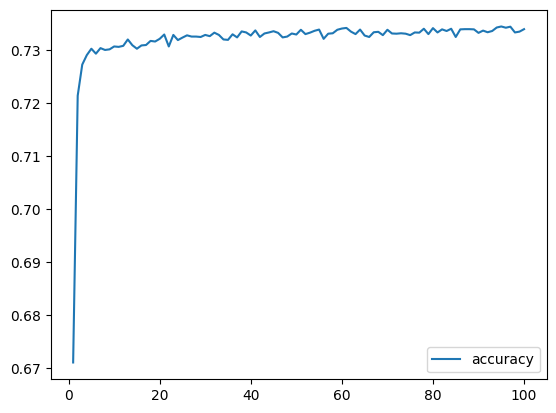

In [278]:
history_df = pd.DataFrame(modelFit.history)
history_df.index += 1

history_df.plot(y="loss")
history_df.plot(y="accuracy")
plt.show()

In [280]:
# Export our model to HDF5 file
nn.save("Model.h5")

In [286]:
from google.colab import files

files.download('Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>